In [ ]:
from google.colab import drive
import zipfile
import os

# # Step 1: Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
x=pd.read_csv('/content/drive/My Drive/extracted_files/styles.csv',on_bad_lines='skip')
x

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/extracted_files/styles.csv'
df = pd.read_csv(file_path,on_bad_lines='skip')

# 1. View basic information about the dataset
print("Dataset Information:")
print(df.info())

# 2. View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# 3. Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())

# 4. Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 5. Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# 6. Unique values per column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 7. Distribution of categorical variables
print("\nValue counts for 'gender' column:")
print(df['gender'].value_counts())

print("\nValue counts for 'masterCategory' column:")
print(df['masterCategory'].value_counts())

# 8. Check for inconsistent categories
print("\nUnique values in 'baseColour':")
print(df['baseColour'].unique())

# 9. Data type summary
print("\nData types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None

First 5 rows of the dataset:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Appare

In [ ]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset


# Assuming the dataset has a column 'imagePath' containing paths to images
image_dir = '/content/drive/My Drive/extracted_files/images/'  # Replace with your image folder path

# Step 1: Check for the image column (mock column for this example)
df['imagePath'] = df['id'].astype(str) + ".jpg"  # Assuming image names are based on 'id'

# Step 2: Function to load and analyze an image
def analyze_image(image_path):
    try:
        img = Image.open(image_path)
        img_array = np.array(img)
        return {
            "width": img.width,
            "height": img.height,
            "mode": img.mode,
            "format": img.format,
            "mean_color": np.mean(img_array, axis=(0, 1)).tolist()  # Average color per channel
        }
    except Exception as e:
        return {"error": str(e)}

# Step 3: Perform analysis for the first few images
image_analysis = []
for _, row in df.iterrows():
    image_path = os.path.join(image_dir, row['imagePath'])
    if os.path.exists(image_path):
        image_info = analyze_image(image_path)
        image_info["imagePath"] = image_path
        image_analysis.append(image_info)
    else:
        image_analysis.append({"imagePath": image_path, "error": "File not found"})

# Step 4: Convert results to a DataFrame
image_df = pd.DataFrame(image_analysis)

# Step 5: Display sample analysis results
print(image_df.head())

# Step 6: Visualize some images
sample_images = image_df[image_df['error'].isnull()]['imagePath'].head(5).tolist()
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for ax, img_path in zip(axes, sample_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
!pip install faiss-gpu

In [ ]:
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import faiss

# Load the VGG16 model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = models.vgg16(pretrained=True)
vgg16.features = torch.nn.Sequential(*list(vgg16.features.children())[:-1])  # Remove classification layer
vgg16 = vgg16.to(device)
vgg16.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features
def extract_features(image_path):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure 3-channel input
        img_tensor = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            features = vgg16(img_tensor).cpu().numpy().flatten()  # Extract features
        return features
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image dimensions and channels
img_width, img_height, chnl = 224, 224, 3

# Load VGG16 without top layers
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnl))
vgg.trainable = False  # Freeze the model

# Add GlobalMaxPooling2D
model = Sequential([
    vgg,
    GlobalMaxPooling2D()
])

# Directory and paths
image_dir = '/content/drive/My Drive/extracted_files/images/'  # Update this path
output_features_path = '/content/drive/My Drive/features.npy'
output_paths_path = '/content/drive/My Drive/valid_paths.npy'

# Function to preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Get all image paths
all_image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Load existing features and paths if resuming
if os.path.exists(output_features_path) and os.path.exists(output_paths_path):
    features = list(np.load(output_features_path, allow_pickle=True))
    processed_paths = list(np.load(output_paths_path, allow_pickle=True))
else:
    features = []
    processed_paths = []

# Identify unprocessed images
unprocessed_paths = [p for p in all_image_paths if p not in processed_paths]

# Process images in batches
batch_size = 32  # Adjust based on available memory
for start in range(0, len(unprocessed_paths), batch_size):
    batch_paths = unprocessed_paths[start:start + batch_size]
    batch_features = []

    for path in batch_paths:
        try:
            img_tensor = preprocess_image(path)
            feature = model.predict(img_tensor).flatten()  # Extract features
            batch_features.append(feature)
        except Exception as e:
            print(f"Error processing {path}: {e}")

    # Append new data to existing
    features.extend(batch_features)
    processed_paths.extend(batch_paths)

    # Save progress periodically
    np.save(output_features_path, np.array(features))
    np.save(output_paths_path, np.array(processed_paths))
    print(f"Processed {len(processed_paths)}/{len(all_image_paths)} images.")


Streaming output truncated to the last 5000 lines.
Processed 1536/44441 images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━

In [ ]:
pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.1 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
image_dir = '/content/drive/My Drive/extracted_files/images/'  # Update this path
output_features_path = '/content/drive/My Drive/features.npy'
output_paths_path = '/content/drive/My Drive/valid_paths.npy'


# Load features and paths
features = np.load(output_features_path)
valid_paths = np.load(output_paths_path, allow_pickle=True)

# Initialize FAISS index
index = faiss.IndexFlatL2(features.shape[1])  # Use L2 distance
index.add(features)

# Save FAISS index
faiss.write_index(index, '/content/drive/My Drive/faiss_index.index')

# Load FAISS index for reruns
index = faiss.read_index('/content/drive/My Drive/faiss_index.index')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


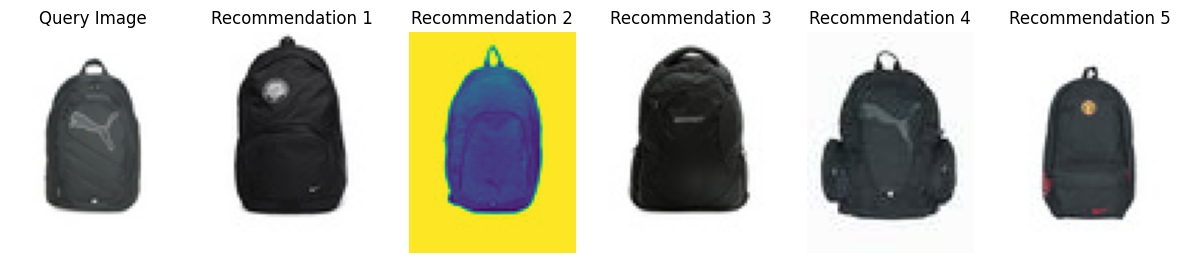

In [ ]:
def recommend(image_path, top_k=5):
    query_feature = model.predict(preprocess_image(image_path)).flatten()
    query_feature = np.expand_dims(query_feature, axis=0)  # Reshape for FAISS
    distances, indices = index.search(query_feature, top_k)
    recommendations = [valid_paths[idx] for idx in indices[0]]
    return recommendations

# Example query
query_image = '/content/drive/My Drive/extracted_files/images/1163.jpg'  # Adjust path
recommended_images = recommend(query_image)

# Visualize results
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommended_images) + 1, 1)
plt.imshow(Image.open(query_image))
plt.title("Query Image")
plt.axis('off')

for i, rec_img in enumerate(recommended_images, start=2):
    plt.subplot(1, len(recommended_images) + 1, i)
    plt.imshow(Image.open(rec_img))
    plt.title(f"Recommendation {i - 1}")
    plt.axis('off')

plt.show()

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

def load_vgg16_model():
    """Load the pre-trained VGG16 model for embedding extraction."""
    base_model = VGG16(weights='imagenet')
    return Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

def preprocess_image(img_path):
    """Load and preprocess an image for VGG16 input."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

def get_embedding(model, img_path):
    """Generate an embedding for a single image."""
    img_array = preprocess_image(img_path)
    embedding = model.predict(img_array)
    return embedding.flatten()

def save_embedding(embedding, save_path):
    """Save embedding as a .npy file."""
    np.save(save_path, embedding)

def process_images(image_dir, save_dir):
    """
    Process all .jpg images in a directory, generate embeddings,
    and save them to the specified directory.
    """
    os.makedirs(save_dir, exist_ok=True)  # Create save directory if it doesn't exist
    model = load_vgg16_model()  # Load the VGG16 model

    for img_file in os.listdir(image_dir):
        if img_file.endswith('.jpg'):  # Process only .jpg files
            img_path = os.path.join(image_dir, img_file)
            print(f"Processing: {img_path}")

            # Generate embedding
            embedding = get_embedding(model, img_path)

            # Save embedding as .npy file
            save_path = os.path.join(save_dir, f"{os.path.splitext(img_file)[0]}.npy")
            save_embedding(embedding, save_path)
            print(f"Saved embedding: {save_path}")

if __name__ == "__main__":
    # Directory with .jpg images
    image_directory = image_dir

    # Directory to save embeddings
    save_directory = "/content/drive/MyDrive/"

    # Process images and save embeddings
    process_images(image_directory, save_directory)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Processing: /content/drive/My Drive/extracted_files/images/8826.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Saved embedding: /content/drive/MyDrive/8826.npy
Processing: /content/drive/My Drive/extracted_files/images/8827.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Saved embedding: /content/drive/MyDrive/8827.npy
Processing: /content/drive/My Drive/extracted_files/images/8828.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Saved embedding: /content/drive/MyDrive/8828.npy
Processing: /content/drive/My Drive/extracted_files/images/8829.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Saved embedding: /content/drive/MyDrive/8829.npy
Processing: /content/drive/My Drive/extracted_files/images/8830.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Saved embedding: /content/drive/MyDrive/8830.npy
Processing: /content/drive/My Drive/extracted_files/images/8831.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Saved embedding: /content/drive/MyDrive/8831.npy
Processing: /conten

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Confirm GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU:", tf.config.list_physical_devices('GPU')[0])
else:
    print("No GPU found. Falling back to CPU.")

def load_vgg16_model():
    """Load the pre-trained VGG16 model for embedding extraction."""
    base_model = VGG16(weights='imagenet')
    return tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

def preprocess_image(img_path):
    """Load and preprocess an image for VGG16 input."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

def get_embedding(model, img_path):
    """Generate an embedding for a single image."""
    img_array = preprocess_image(img_path)
    embedding = model.predict(img_array)
    return embedding.flatten()

def process_images_in_batches(image_dir, save_path, batch_size=9000):
    """
    Process images in batches of `batch_size`, append embeddings to the save file,
    and continue until all images are processed.
    """
    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure save directory exists
    model = load_vgg16_model()  # Load the VGG16 model
    processed_count = 0  # Track the number of processed images

    # Check if the save file exists and load existing embeddings
    if os.path.exists(save_path):
        existing_embeddings = np.load(save_path)
        processed_count = existing_embeddings.shape[0]
        print(f"Loaded existing embeddings with {processed_count} entries.")
    else:
        existing_embeddings = np.empty((0, 4096))  # Initialize an empty array

    embeddings = []  # Temporary list to hold new embeddings
    images_to_process = sorted(os.listdir(image_dir))  # Sort files for consistent processing
    images_to_process = [img for img in images_to_process if img.endswith('.jpg')]

    for img_file in images_to_process[processed_count:]:
        img_path = os.path.join(image_dir, img_file)
        print(f"Processing: {img_path}")

        try:
            # Generate embedding
            embedding = get_embedding(model, img_path)
            embeddings.append(embedding)

            # Save when batch size is reached
            if len(embeddings) >= batch_size:
                embeddings = np.array(embeddings)
                combined_embeddings = np.vstack((existing_embeddings, embeddings))
                np.save(save_path, combined_embeddings)
                print(f"Saved {len(embeddings)} new embeddings. Total: {combined_embeddings.shape[0]}")
                embeddings = []  # Reset batch
                existing_embeddings = combined_embeddings
        except Exception as e:
            print(f"Error processing {img_file}: {e}")

    # Save any remaining embeddings
    if embeddings:
        embeddings = np.array(embeddings)
        combined_embeddings = np.vstack((existing_embeddings, embeddings))
        np.save(save_path, combined_embeddings)
        print(f"Saved final batch of {len(embeddings)} embeddings. Total: {combined_embeddings.shape[0]}")



if __name__ == "__main__":
    # Specify input directory and output file
    image_directory ='/content/drive/MyDrive/extracted_files/images'
    save_file_path = '/content/drive/MyDrive/Colab Notebooks/embeddings2'

    # Validate input directory
    if not os.path.exists(image_directory):
        print(f"Error: Directory {image_directory} does not exist.")
    else:
        # Process images in batches of 9,000 and save progressively
        process_images_in_batches(image_directory, save_file_path, batch_size=4000)


Streaming output truncated to the last 5000 lines.
Processing: /content/drive/MyDrive/extracted_files/images/11976.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11977.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11978.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11979.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11980.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11981.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11983.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11985.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing: /content/drive/MyDrive/extracted_files/images/11986.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


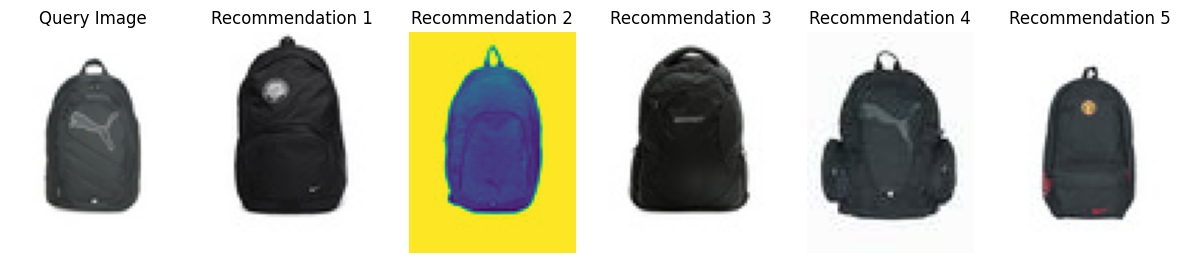

In [ ]:
def recommend(image_path, top_k=5):
    query_feature = model.predict(preprocess_image(image_path)).flatten()
    query_feature = np.expand_dims(query_feature, axis=0)  # Reshape for FAISS
    distances, indices = index.search(query_feature, top_k)
    recommendations = [valid_paths[idx] for idx in indices[0]]
    return recommendations

# Example query
query_image = '/content/drive/My Drive/extracted_files/images/1163.jpg'  # Adjust path
recommended_images = recommend(query_image)

# Visualize results
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommended_images) + 1, 1)
plt.imshow(Image.open(query_image))
plt.title("Query Image")
plt.axis('off')

for i, rec_img in enumerate(recommended_images, start=2):
    plt.subplot(1, len(recommended_images) + 1, i)
    plt.imshow(Image.open(rec_img))
    plt.title(f"Recommendation {i - 1}")
    plt.axis('off')

plt.show()